In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
import warnings
from scipy import sparse
import itertools
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore")

In [2]:
lambdas = [2, 1]
mu = 1
epsilon = [0.1, 0.01, 0.001, 0.0001]
N = 10**4

# SIZE

## Normal binning

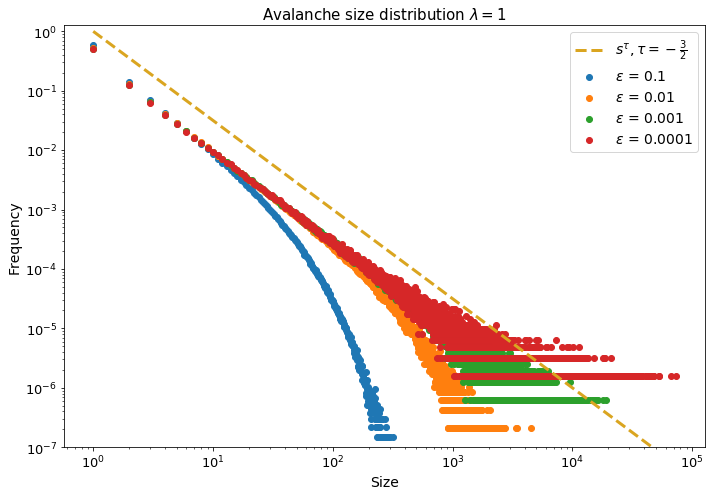

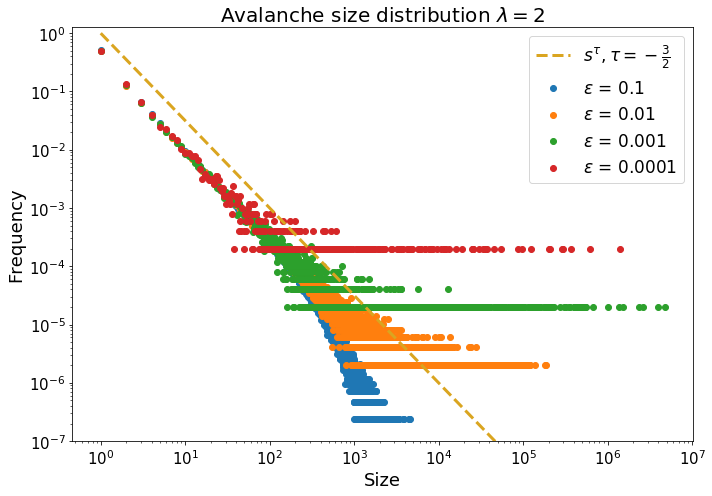

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    sizes = np.load("final_size_"+str(eps)+"_1"+".npy")
    sizes.sort()

    x_sizes, y_sizes = np.unique(sizes, return_counts=True)
    y_sizes = y_sizes / np.sum(y_sizes)
    ax.scatter(x_sizes, y_sizes, marker ="o", label=r"$\epsilon$ = "+str(eps))

ax.plot(x_sizes, np.power(x_sizes,-3/2), linestyle="--", linewidth= 3,
        color="goldenrod", label=(r"$s^{\tau}, \tau=-\frac{3}{2}$"))

ax.set_xlabel("Size", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(10**(-7),10**0.1)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Avalanche size distribution $\lambda = 1$", fontsize=15)
ax.legend(fontsize=14)

fig.tight_layout()


fig, ax1 = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    sizes = np.load("final_size_"+str(eps)+"_2"+".npy")
    sizes.sort()

    x_sizes, y_sizes = np.unique(sizes, return_counts=True)
    y_sizes = y_sizes / np.sum(y_sizes)
    ax1.scatter(x_sizes, y_sizes, marker ="o", label=r"$\epsilon$ = "+str(eps))

ax1.plot(x_sizes, np.power(x_sizes,-3/2), linestyle="--", linewidth= 3,
        color="goldenrod", label=(r"$s^{\tau}, \tau=-\frac{3}{2}$"))

ax1.set_xlabel("Size", fontsize=18)
ax1.set_ylabel("Frequency", fontsize=18)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim(10**(-7),10**0.1)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title(r"Avalanche size distribution $\lambda = 2$", fontsize=20)
ax1.legend(fontsize=17)

fig.tight_layout()

## Logaritmic Binning

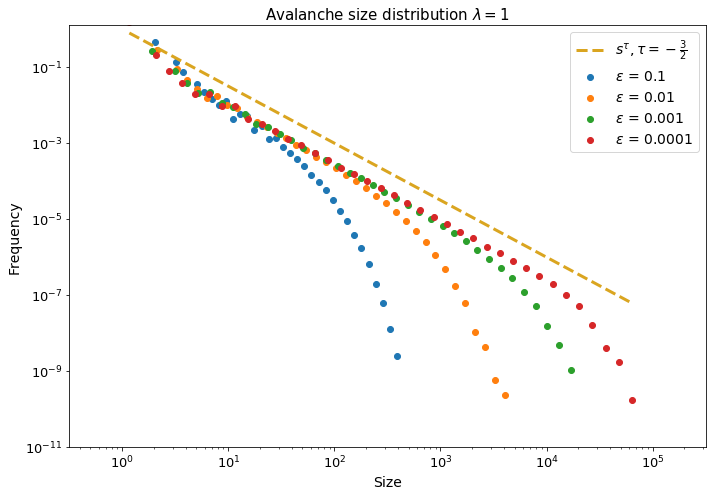

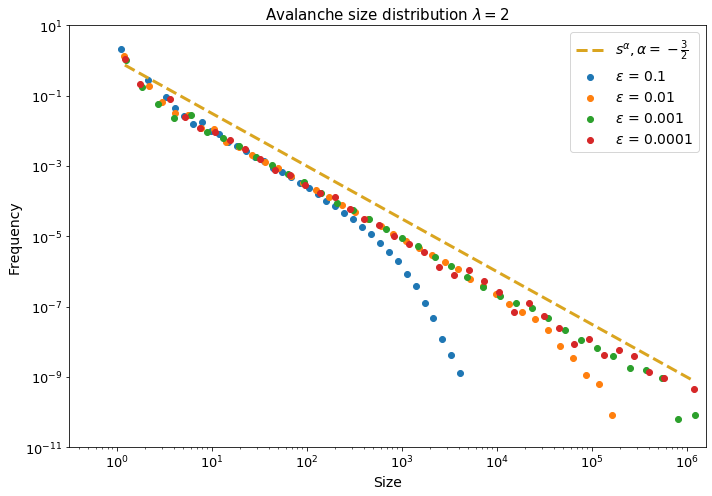

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    sizes = np.load("final_size_"+str(eps)+"_1"+".npy")
    sizes.sort()
    
    bins = np.logspace(np.log10(np.min(sizes)),np.log10(np.max(sizes+1)),40)
    y_sizes, bins= np.histogram(sizes, bins=bins, density=True)
    x_sizes = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]

    ax.scatter(x_sizes, y_sizes, marker ="o", label=r"$\epsilon$ = "+str(eps))

ax.plot(x_sizes, np.power(x_sizes,-3/2), linestyle="--", linewidth= 3,
        color="goldenrod", label=(r"$s^{\tau}, \tau=-\frac{3}{2}$"))

ax.set_xlabel("Size", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(10**(-11),10**0.1)
ax.set_xlim(10**(-0.5),10**5.5)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Avalanche size distribution $\lambda = 1$", fontsize=15)
ax.legend(fontsize=14)

fig.tight_layout()

fig, ax1 = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    sizes = np.load("final_size_"+str(eps)+"_2"+".npy")
    sizes.sort()

    bins = np.logspace(np.log10(np.min(sizes)),np.log10(np.max(sizes+1)),40)
    y_sizes, bins= np.histogram(sizes, bins=bins, density=True)
    x_sizes = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]

    ax1.scatter(x_sizes, y_sizes, marker ="o", label=r"$\epsilon$ = "+str(eps))


ax1.plot(x_sizes, np.power(x_sizes,-3/2), linestyle="--", linewidth= 3,
        color="goldenrod", label=(r"$s^{\alpha}, \alpha=-\frac{3}{2}$"))

ax1.set_xlabel("Size", fontsize=14)
ax1.set_ylabel("Frequency", fontsize=14)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim(10**(-11),10**(1))
ax1.set_xlim(10**(-0.5),10**(6.2))
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_title(r"Avalanche size distribution $\lambda = 2$", fontsize=15)
ax1.legend(fontsize=14)

fig.tight_layout()

# TIME

## Normal binning

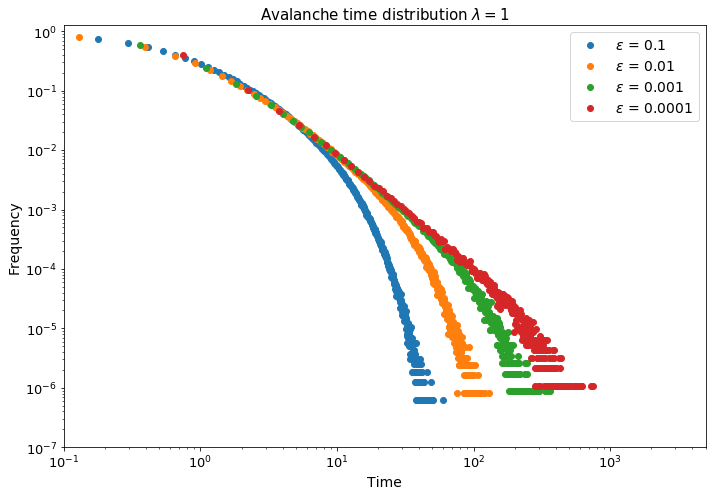

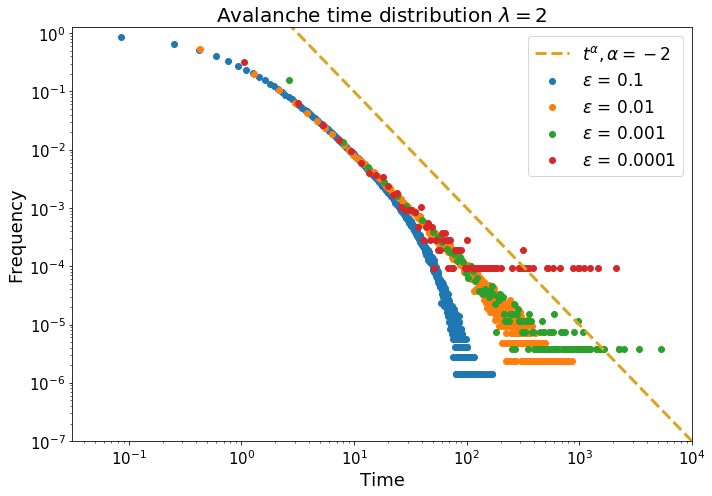

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    times = np.load("final_time_"+str(eps)+"_1"+".npy")
    times.sort()

    y_times, bins = np.histogram(times, bins=500, density=True)
    x_times = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]
    ax.scatter(x_times, y_times, marker ="o", label=r"$\epsilon$ = "+str(eps))

#ax.plot(np.arange(1,10**5), (10**6)*np.power(np.arange(1,10**5),-2), linestyle="--", linewidth= 3,
 #       color="goldenrod", label=(r"$s^{\alpha}, \alpha=-\frac{3}{2}$"))

ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(10**(-7),10**0.1)
ax.set_xlim(10**(-1), 5*10**3)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Avalanche time distribution $\lambda = 1$", fontsize=15)
ax.legend(fontsize=14)


fig.tight_layout()


fig, ax1 = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    times = np.load("final_time_"+str(eps)+"_2"+".npy")
    times.sort()

    y_times, bins = np.histogram(times, bins=1000, density=True)
    x_times = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]
    ax1.scatter(x_times, y_times, marker ="o", label=r"$\epsilon$ = "+str(eps))

ax1.plot(np.arange(10**(-1),10**4,1), (10**1)*np.power(np.arange(10**(-1),10**4,1, dtype=float),-2), linestyle="--", linewidth= 3,
       color="goldenrod", label=(r"$t^{\alpha}, \alpha=-2$"))

ax1.set_xlabel("Time", fontsize=18)
ax1.set_ylabel("Frequency", fontsize=18)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim(10**(-7),10**0.1)
ax1.set_xlim(10**(-1.5), 10**4)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title(r"Avalanche time distribution $\lambda = 2$", fontsize=20)
ax1.legend(fontsize=17)

fig.tight_layout()

## Logaritmic bins

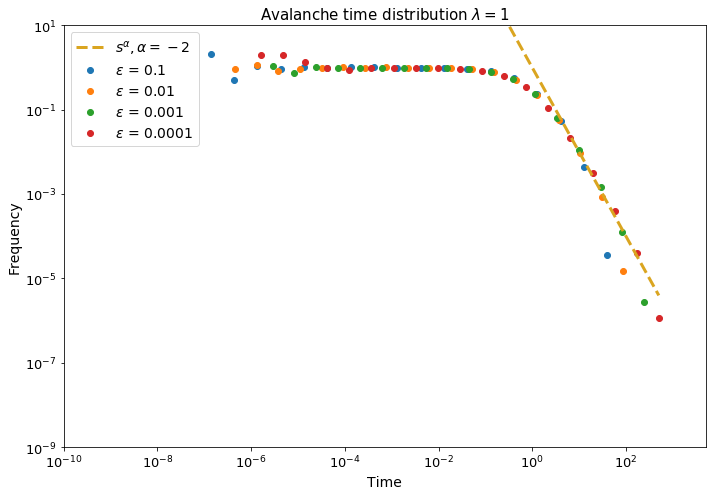

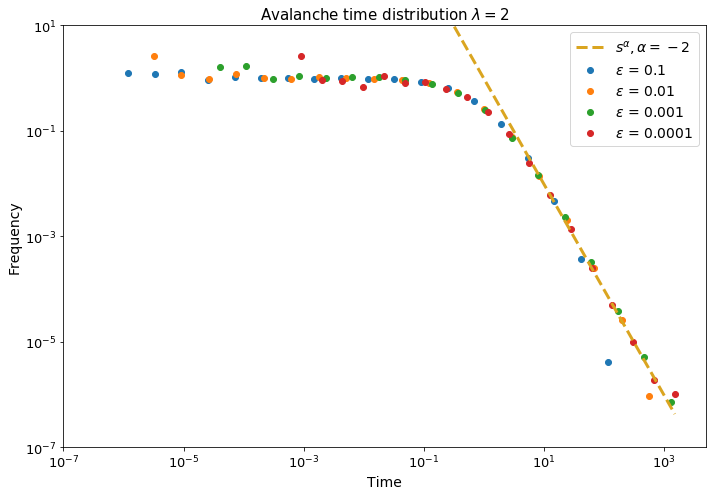

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    times = np.load("final_time_"+str(eps)+"_1"+".npy")
    times.sort()
    
    bins1 = np.logspace(np.log10(np.min(times)),np.log10(np.max(times+1)),20)

    y_times, bins = np.histogram(times, bins=bins1, density=True)
    x_times = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]
    ax.scatter(x_times, y_times, marker ="o", label=r"$\epsilon$ = "+str(eps))

ax.plot(x_times, np.power(x_times,-2), linestyle="--", linewidth= 3,
       color="goldenrod", label=(r"$s^{\alpha}, \alpha=-2$"))

ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(10**(-9),10**1)
ax.set_xlim(10**(-10), 5*10**3)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Avalanche time distribution $\lambda = 1$", fontsize=15)
ax.legend(fontsize=14)


fig.tight_layout()


fig, ax1 = plt.subplots(1,1, figsize=(10,7))

for eps in epsilon:
    
    times = np.load("final_time_"+str(eps)+"_2"+".npy")
    times.sort()

    bins = np.logspace(np.log10(np.min(times)),np.log10(np.max(times+1)),20)
    
    y_times, bins = np.histogram(times, bins=bins, density=True)
    x_times = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]
    ax1.scatter(x_times, y_times, marker ="o", label=r"$\epsilon$ = "+str(eps))

ax1.plot(x_times, np.power(x_times,-2), linestyle="--", linewidth= 3,
       color="goldenrod", label=(r"$s^{\alpha}, \alpha=-2$"))

ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Frequency", fontsize=14)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylim(10**(-7),10**1)
ax1.set_xlim(10**(-7), 5*10**3)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_title(r"Avalanche time distribution $\lambda = 2$", fontsize=15)
ax1.legend(fontsize=14)

fig.tight_layout()

# $\rho$

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
cmap = plt.get_cmap('viridis')

l= 1
for i,eps in enumerate(epsilon):

    rho = np.load("active_story_"+str(eps)+"_1.npy")[9*10**7:10**8] #just some 
    rho = rho/N
    ax.plot(rho, label=r"$\epsilon$=%.4f"%(eps), color=cmap(70*i), alpha=0.7)
    mean = np.mean(rho)
    std = np.std(rho)
    ax.axhline(mean, color=cmap(70*i), linestyle="dashdot", 
                label="mean = %.3f, std = %.3f"%(mean, std), alpha=0.7)
    
#ax.axhline( 1 - mu/l + eps*mu*(1/(l*(l-mu))), color=cmap(300*eps), linestyle="--", label=r"$Th. \rho$")
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel(r"$\rho$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Fraction of active sites in time $\lambda = 1$", fontsize=15)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax.legend(fontsize=14)

fig.tight_layout()

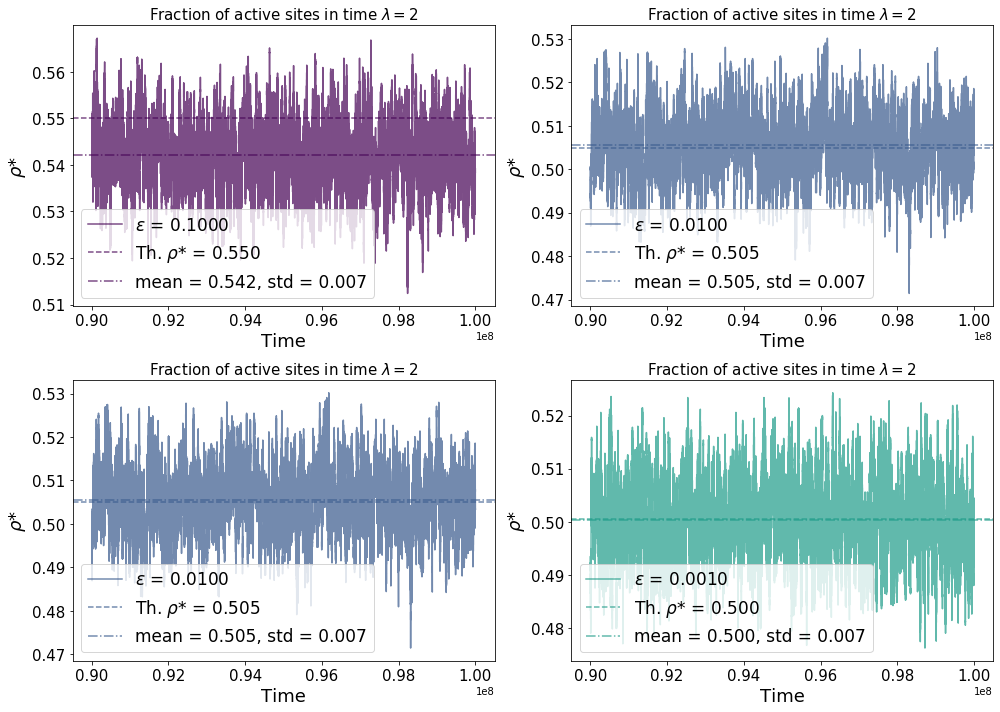

In [42]:
fig, ax = plt.subplots(2,2, figsize=(14,10))

for j in range(0,2):
    
    for k in range(0,2):

        i = j + k
        eps = epsilon[i]

        cmap = plt.get_cmap('viridis')
        l=2
        rho = np.load("active_story_"+str(eps)+"_2.npy")[9*10**7:10**8]
        rho = rho/N
        
        time = np.arange(9*10**7,10**8,1)
        
        ax[j][k].plot(time, rho, label=r"$\epsilon$ = %.4f"%(eps), color=cmap(70*i), alpha=0.7)
        ax[j][k].axhline( 1 - mu/l + eps*mu*(1/(l*(l-mu))), color=cmap(70*i), linestyle="--", 
                    label=r"Th. $\rho$* = %.3f"%(1 - mu/l + eps*mu*(1/(l*(l-mu)))), alpha=0.7)
        mean = np.mean(rho)
        std = np.std(rho)
        ax[j][k].axhline(mean, color=cmap(70*i), linestyle="dashdot", 
                    label="mean = %.3f, std = %.3f"%(mean, std), alpha=0.7)

        ax[j][k].set_xlabel("Time", fontsize=18)
        ax[j][k].set_ylabel(r"$\rho$*", fontsize=18)
        ax[j][k].tick_params(axis='both', which='major', labelsize=15)
        ax[j][k].set_title(r"Fraction of active sites in time $\lambda = 2$", fontsize=15)
        ax[j][k].legend(fontsize=17)
        ax[j][k].ticklabel_format(axis="x", style="sci",scilimits=(0,0))

fig.tight_layout()

# TEMPORAL AVALANCHES

In [ ]:
def pareto(x, a,b,c):
    return a*(x**b) + c

In [133]:
tau = np.load("tau_story_0.0001_1.npy")
rho = np.load("active_story_0.0001_1.npy")
rho = np.concatenate((np.array([0]), rho))
tau = np.concatenate((np.array([0]), tau))
IEI = np.mean(np.diff(tau))
print("Intervent interval:", IEI)

bin_story = np.floor(tau/IEI).astype(int) #Cosa vuol dire? Il numero mi dice a che bin (calcolati in unità di IEI) appartiene l'evento'''
zeros = np.argwhere(rho == 0).flatten()

Intervent interval: 0.0062864693995886714


In [134]:
start = [0]
end = []
arg_start = [0]
arg_end = []

for i,z in enumerate(zeros[1:]):
    if ((bin_story[z+1] - bin_story[z]) > 1):
        start.append(bin_story[z+1])
        end.append(bin_story[z])
        arg_start.append(z+1)
        arg_end.append(z)
start = start[:-1] #remove last avalanche that does not stop
arg_start = arg_start[:-1]
len(start) == len(end)

True

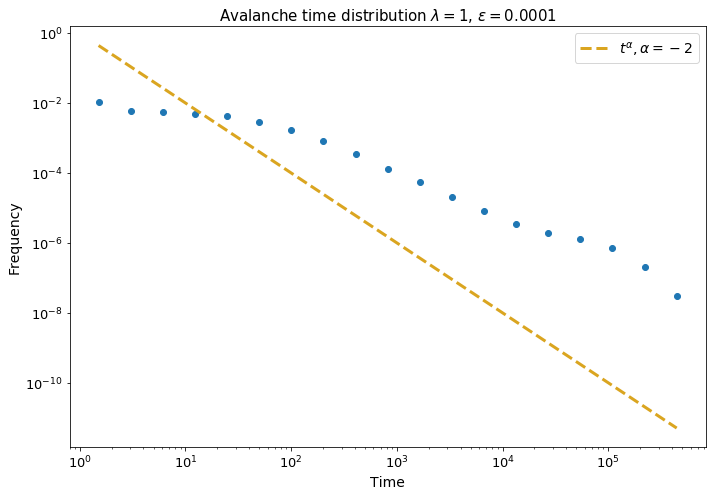

In [147]:
lenghts = (np.array(end) - np.array(start))+1
bins = np.logspace(np.log10(np.min(lenghts)),np.log10(np.max(lenghts+1)),20)
y_times, bins = np.histogram(lenghts, bins=bins, density=True)
x_times = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.scatter(x_times, y_times)

ax.plot(x_times, np.power(x_times,-2), linestyle="--", linewidth= 3,
       color="goldenrod", label=(r"$t^{\alpha}, \alpha=-2$"))

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Avalanche time distribution $\lambda = 1$, $\epsilon=0.0001$", fontsize=15)
ax.legend(fontsize=14)
fig.tight_layout()

In [9]:
sizes=[]
for s,e in zip(arg_start,arg_end):
    avalanche = rho[s:e+1]
    size = 0
    for i in range(len(avalanche)-1):
        if avalanche[i+1] > avalanche[i]:
            size += 1
    sizes.append(size)

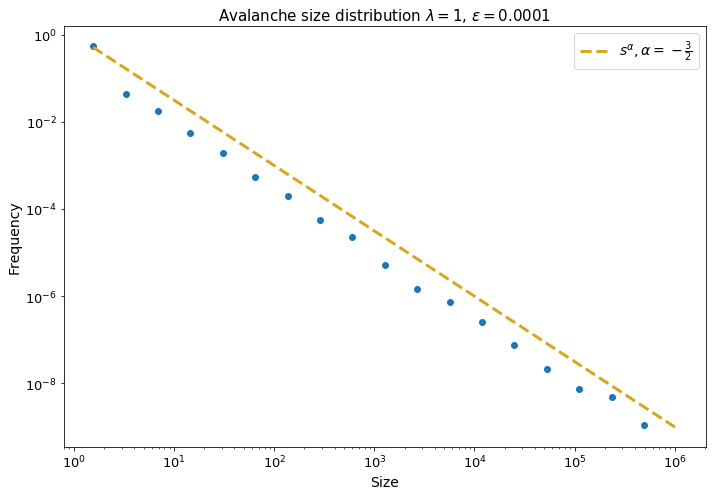

In [144]:
bins = np.logspace(np.log10(np.min(sizes)),np.log10(np.max(sizes+1)),20)
y_sizes, bins = np.histogram(sizes, bins=bins, density=True)
x_sizes = [bins[i]+0.5*(bins[i+1]-bins[i]) for i in range(len(bins)-1)]

fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.scatter(x_sizes, y_sizes)
ax.plot(x_sizes,np.power(x_sizes,-3/2), linestyle="--", linewidth= 3,
       color="goldenrod", label=(r"$s^{\alpha}, \alpha=-\frac{3}{2}$"))

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Size", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title(r"Avalanche size distribution $\lambda = 1$, $\epsilon=0.0001$", fontsize=15)
ax.legend(fontsize=14)
fig.tight_layout()